# visualize dataframes

In [1]:
!pip -q install earthaccess

In [2]:
import pandas as pd
import glob
import create_dataset
import seaborn as sns

In [3]:
dataframes_folder = 'data/dataframes/'
fn = 'grandmesa_2023_tar_2023-06-01_ref_2023-06-01_2023-09-01_median_100.parquet'
fn = 'iceland_trollaskagi_peninsula_2023_tar_2023-06-01_ref_2023-06-01_2023-09-01_median_100.parquet'
fn = 'iceland_trollaskagi_peninsula_2015_tar_2015-06-27_ref_2015-01-01_2015-03-01_median_100.parquet'
fn = 'iceland_trollaskagi_peninsula_2015_tar_2015-06-27_ref_2015-01-01_2015-12-31_median_100.parquet'
fn = 'iceland_trollaskagi_peninsula_2015_tar_2015-06-27_ref_2015-01-01_2015-12-31_median_100.parquet'
fn = 'iceland_trollaskagi_peninsula_2015_tar_2015-06-27_ref_2015-01-01_2015-03-31_median_100.parquet'
#fn = 'iceland_trollaskagi_peninsula_2020_tar_2020-06-27_ref_2020-01-01_2020-03-31_median_100.parquet'
fn = 'grandmesa_2020_tar_2020-04-27_ref_2020-01-01_2020-03-31_median_100.parquet'
fn = 'grandmesa_2020_tar_2020-04-27_ref_2020-06-01_2020-07-31_median_100.parquet'

dataframe = pd.read_parquet(f'{dataframes_folder}{fn}')

In [4]:
ndsi_thresh = 40

In [5]:
dataframe = create_dataset.dataframe_ndsi_to_binary(dataframe,ndsi_thresh) # maybe <.2 is 0, >.7 is 1 for mixed modis pixel issues?

In [6]:
dataframe = create_dataset.dataframe_numbers_to_classes(dataframe)

In [7]:
parts = fn.split('_')
target_time = parts[parts.index('tar') + 1]

time_diff = (dataframe['time'] - pd.to_datetime(target_time)).abs()
mask = time_diff <= pd.Timedelta(days=10)

dataframe = dataframe[mask]

In [8]:
pal = {'no snow':'peru','snow':'dodgerblue'} 

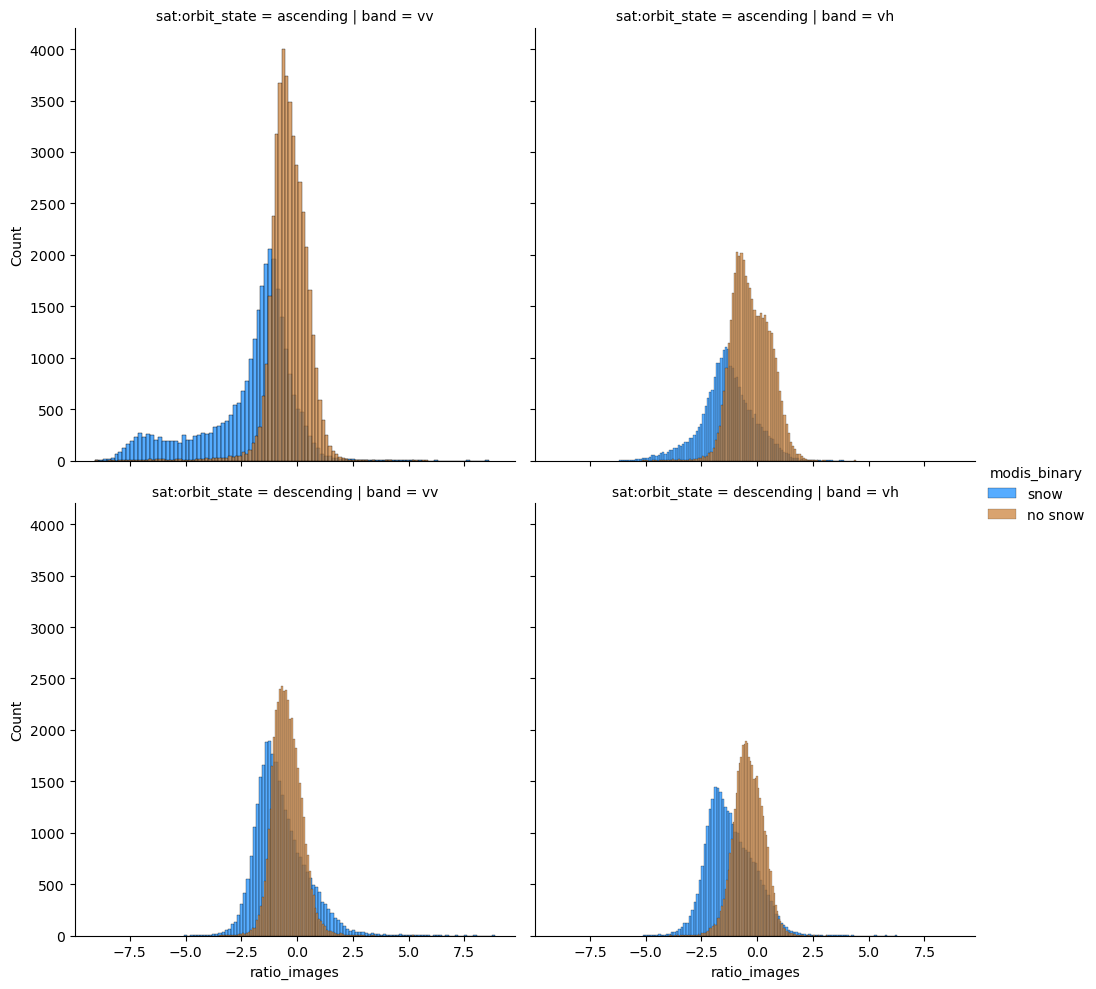

In [9]:
g = sns.FacetGrid(dataframe, row="sat:orbit_state", col="band", hue="modis_binary", legend_out=True, height=5, palette=pal)
g.map(sns.histplot, "ratio_images", bins=100)
g.add_legend()

In [10]:
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']


# Create bins for the 'local_incidence_angle' column
dataframe['local_incidence_angle_bins'] = pd.cut(dataframe['local_incidence_angle'], bins=bins, labels=labels)

dataframe['forest_cover_fraction_bins'] = pd.cut(dataframe['forest_cover_fraction'], bins=bins, labels=labels)

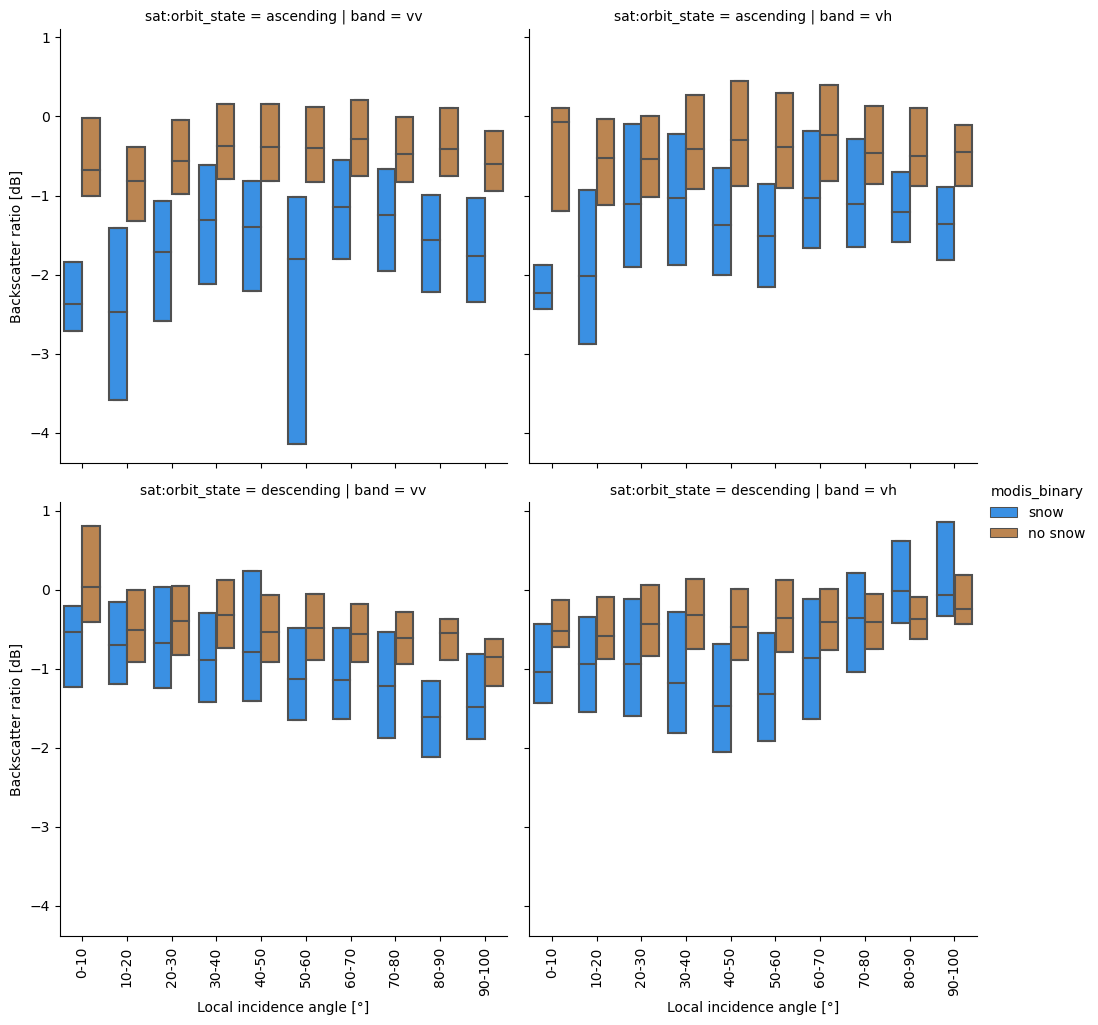

In [11]:
g = sns.catplot(x='local_incidence_angle_bins', y='ratio_images', hue="modis_binary", data=dataframe,
               row="sat:orbit_state", col='band', kind='box', showfliers=False, whis=0, palette=pal)

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Backscatter ratio [dB]')
    ax.set_xlabel('Local incidence angle [\N{degree sign}]')

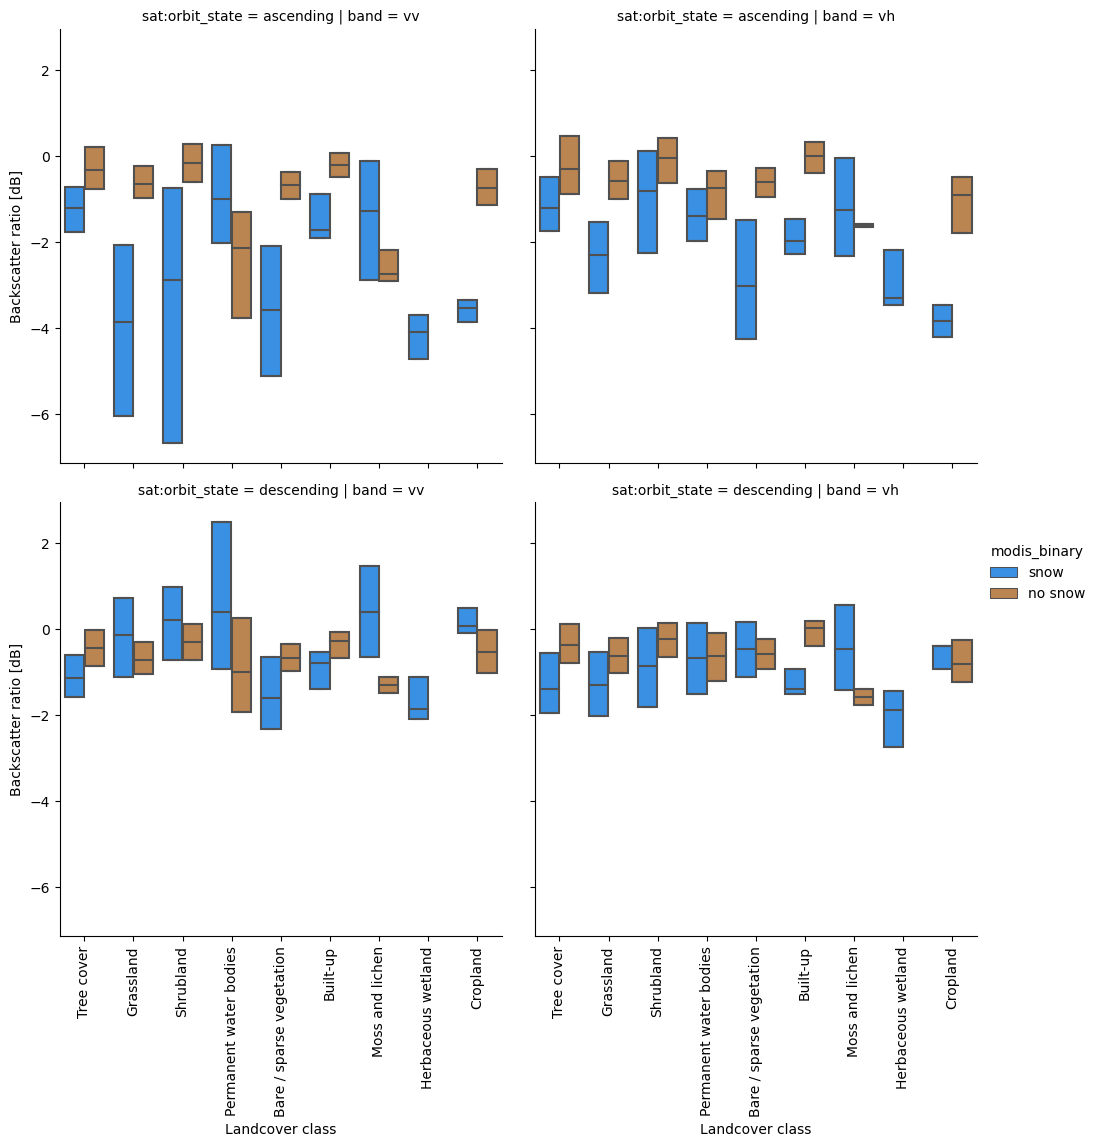

In [12]:
g = sns.catplot(x='esa_worldcover', y='ratio_images', hue="modis_binary", data=dataframe,
               row="sat:orbit_state", col='band', kind='box', showfliers=False, whis=0, palette=pal)


for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Backscatter ratio [dB]')
    ax.set_xlabel('Landcover class')

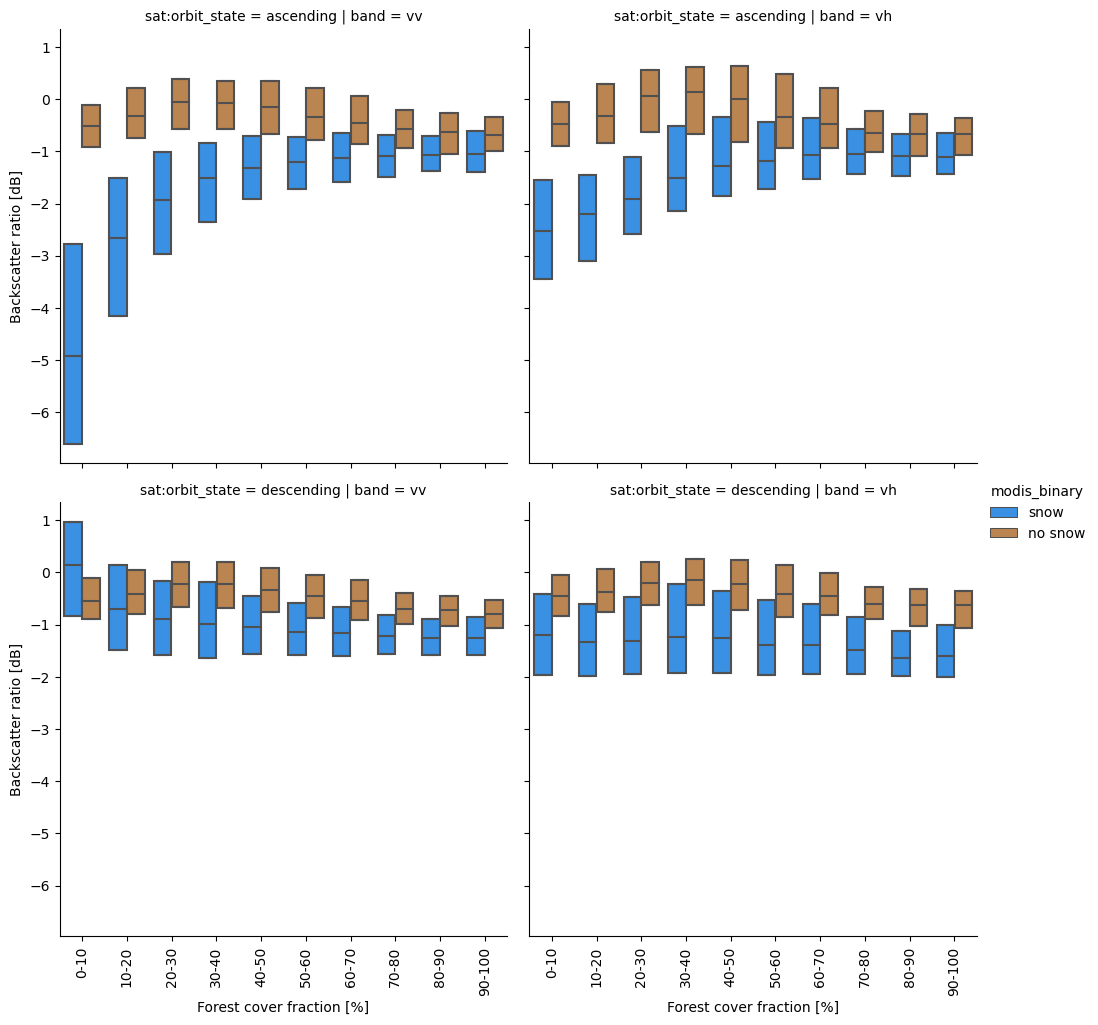

In [13]:
g = sns.catplot(x='forest_cover_fraction_bins', y='ratio_images', hue="modis_binary", data=dataframe,
               row="sat:orbit_state", col='band', kind='box', showfliers=False, whis=0, palette=pal)

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Backscatter ratio [dB]')
    ax.set_xlabel('Forest cover fraction [\N{percent sign}]')

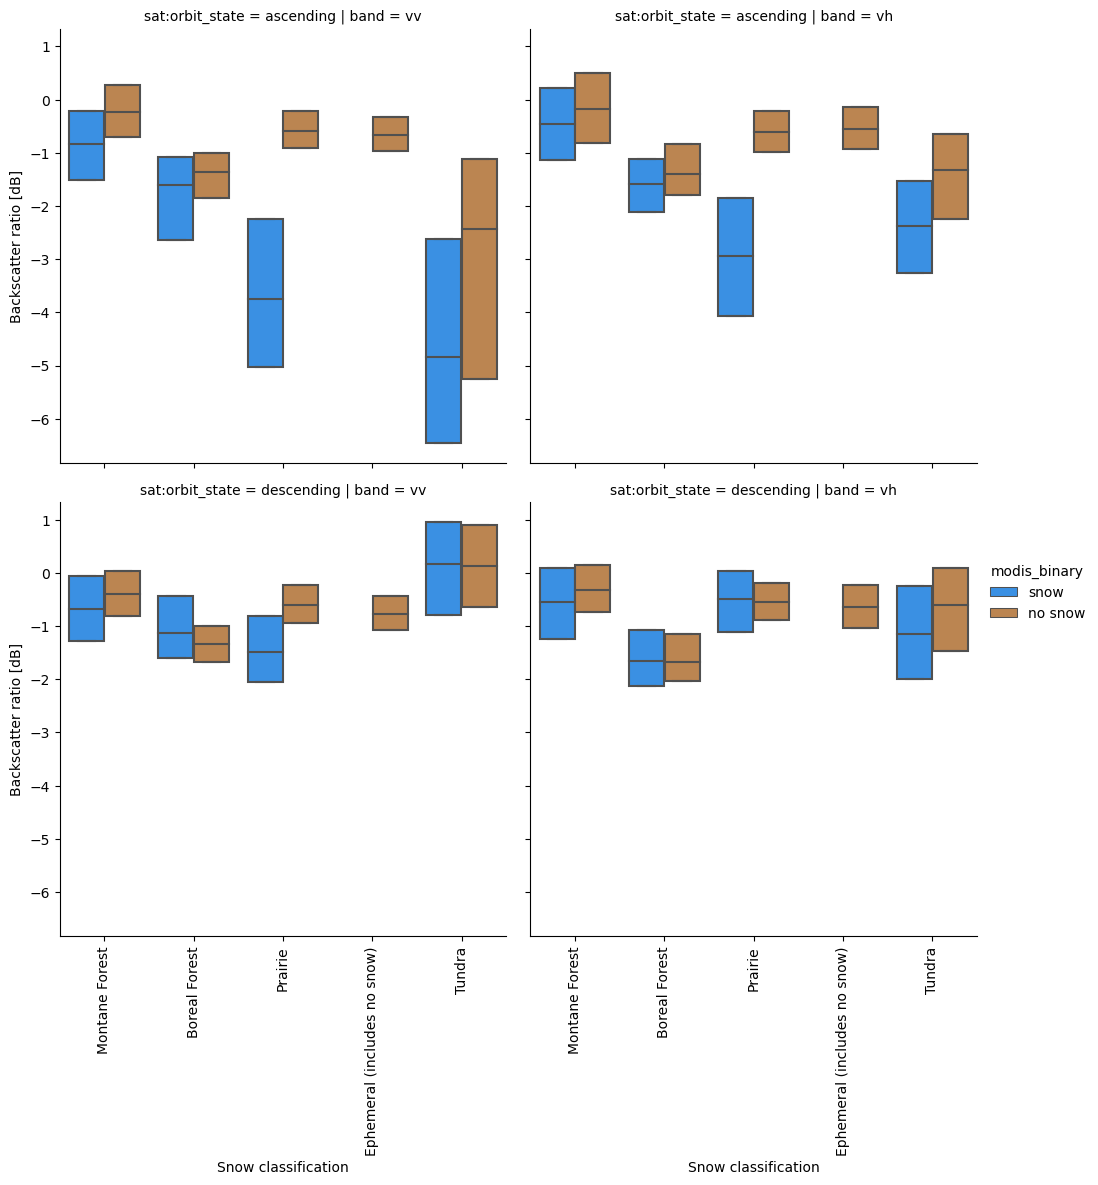

In [14]:
g = sns.catplot(x='snow_class', y='ratio_images', hue="modis_binary", data=dataframe,
               row="sat:orbit_state", col='band', kind='box', showfliers=False, whis=0, palette=pal)

for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
    ax.set_ylabel('Backscatter ratio [dB]')
    ax.set_xlabel('Snow classification')